The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm partition the input data into *k* disjoint clusters by iteratively applying the following two steps:

1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

In this section, we perform k-means clustering on a toy example of movie ratings dataset. We first create the dataset as follows.

In [ ]:
import pandas as pd

In [ ]:
ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.

In [ ]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments. 

In [ ]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

### Question 1

Complete the codes below to perform a K-mean clustering on the Iris dataset

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

import pandas as pd
import numpy as np
 
%matplotlib inline

In [ ]:
df = pd.read_csv('data/iris.csv', header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
print (df.head())
print (df.shape)

In [ ]:
X = df.drop('class', axis=1)  
y_text = df['class']

The iris dataset has three classes: Iris-setosa, Iris-virginica, and Iris-versicolor. The class labels need to be converted to numeric form for Kmean.

In [ ]:
y = pd.Series(range(0,y_text.size), index = range(0, y_text.size))
for i in range(0,y_text.size):
    if (y_text[i] == '______'):
        y[i] = 0;
    elif (y_text[i] == ______):
        y[i] = 1;
    else:
        y[i] = 2;

In [ ]:
model = KMeans(n_clusters=__)
model.fit(X)

In [ ]:
plt.figure(figsize=(14,7))
 
# Create a colormap (how many colors?)
colormap = np.random.rand(__,)
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X['petal length'], X['petal width'], c=colormap[y], s=40)
plt.title('Real Classification')

predY = np.choose(model.labels_, [2, 0, 1]).astype(np.int64)

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X['petal length'], X['petal width'], c=colormap[predY], s=40)
plt.title('K Mean Classification')

Next, we examine examples of applying hierarchical clustering to the vertebrate dataset used in Module 6 (Classification). Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

In [ ]:
import pandas as pd

data = pd.read_csv('data/vertebrate.csv',header='infer')
data

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.as_matrix(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

In [ ]:
Z = hierarchy.linkage(X.as_matrix(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

In [ ]:
Z = hierarchy.linkage(X.as_matrix(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

In density-based clustering, we identify the individual clusters as high-density regions that are separated by regions of low density. DBScan is one of the most popular density based clustering algorithms. In DBScan, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples). 

In [1]:
import pandas as pd

data = pd.read_csv('data/chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

In [2]:
data

,x,y
0,650.914,214.888
1,41.767,179.408
2,509.126,233.749
3,486.403,152.427
4,46.883,367.904
5,539.270,343.616
6,614.930,139.613
7,61.127,99.230
8,334.174,380.344
9,284.575,412.521


We apply the DBScan clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The clusters are assigned to IDs between 0 to 8 while the noise points are assigned to a cluster ID equals to -1.

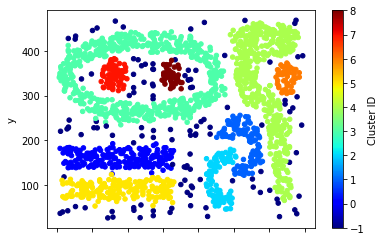

In [5]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')

One of the main limitations of the k-means clustering algorithm is its tendency to seek for globular-shaped clusters. Thus, it does not work when applied to datasets with arbitrary-shaped clusters or when the cluster centroids overlapped with one another. Spectral clustering can overcome this limitation by exploiting properties of the similarity graph to overcome such limitations. To illustrate this, consider the following two-dimensional datasets.

In [ ]:
import pandas as pd

data1 = pd.read_csv('data/2d_data.txt', delimiter=' ', names=['x','y'])
data2 = pd.read_csv('data/elliptical.txt', delimiter=' ', names=['x','y'])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data1.plot.scatter(x='x',y='y',ax=ax1)
data2.plot.scatter(x='x',y='y',ax=ax2)

Below, we demonstrate the results of applying k-means to the datasets (with k=2).

In [ ]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data1)
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

k_means2 = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')

The plots above show the poor performance of k-means clustering. Next, we apply spectral clustering to the datasets. Spectral clustering converts the data into a similarity graph and applies the normalized cut graph partitioning algorithm to generate the clusters. In the example below, we use the Gaussian radial basis function as our affinity (similarity) measure. Users need to tune the kernel parameter (gamma) value in order to obtain the appropriate clusters for the given dataset. 

In [ ]:
from sklearn import cluster
import pandas as pd

spectral = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='rbf',gamma=5000)
spectral.fit(data1)
labels1 = pd.DataFrame(spectral.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

spectral2 = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='rbf',gamma=100)
spectral2.fit(data2)
labels2 = pd.DataFrame(spectral2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('Spectral Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('Spectral Clustering')

## Question 2

This is a free-form exercise. You are to use the *titanic3.xls* data and perform a K-mean clustering analysis on the data. In data mining, and in data science in general, we always want to *let the data do the talking*. Use one or more of the techniques above to analyze this data, and draw some conclusions from your analysis. Think about a story you want to tell based on the Titanic data. 